In [2]:
install.packages("janitor")

library(repr)
library(tidyverse)
library(tidymodels)
library(readr)
library(janitor)
library(dplyr)
library(cowplot)

options(digits = 4)
set.seed(2)

also installing the dependency ‘snakecase’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9    

#### Group project report

# Data Analysis on Air Quality Index of Counties in the US

DSCI100 group project-006-14  
Group member:  
`Dorothy GER`  
`Charlie Hua`  
`Callie Phelps`  
`Hancheng Zhang `


## Introduction

Air quality arises a lot df attention in recent years since more and more research indicates that air pollutants poses siginificant threats to the health of human being and other lives. It is a significant risk factor for a number of pollution-related diseases, including respiratory infections, heart disease, COPD, stroke and lung cancer(Jasarevic & Osseiran, 2014). For the public, knowing the air qualities of a cities guarantees people to choose a better place to live. And for governments and some orgnizations, knowing the air qualities could help them to make improvements. In this report, we will be working on a dataset about the Air Quality in the United States using the programming language R as a tool for our analysis. 

Our dataset comes from the US EPA’s Air Quality System, and the specific one we are working on is Annual AQI (Air quality index) by county for 2021. This dataset is the annual summary data of Air Quality Index by county in the United States for 2021. A higher AQI indicates higher level of exposure to pollutants in the air. Higher air quality index values also have a positive association with increased population-level air pollution health risks (Perlmutt 2019). Some columns in the dataset (like `days_CO`, `days_NO2`, `days_Ozone`, `days_SO2`, `days_pm2.5`, `days_pm10`) represent the numbers of days when a specific pollutant exdeeded the primary/secondary air quality standard. The various columns from `Good_Days` to `Hazardous_Days` are also determined by the such daily monitoring criteria. 

Using this data set and our preliminary analysis, we want answer the question **“Do a county have a satifying or a not satifying air quality for the health of human being and other lives? ”**.



## Methods & Results

### --Pre-analysis preparation

This air quality report is based on the "2021 Annual Summary Data by County" from **United States Environmental Protection Agency(EPA)**. And a brief version is showned as below(*table1.1*).

In [3]:
url <- "https://raw.githubusercontent.com/Hansen0014/Air-quality-data/main/annual_aqi_by_county_2021.csv"
Air_quality <- read.csv(url)
head(Air_quality)

,State,County,Year,Days.with.AQI,Good.Days,Moderate.Days,Unhealthy.for.Sensitive.Groups.Days,Unhealthy.Days,Very.Unhealthy.Days,Hazardous.Days,Max.AQI,X90th.Percentile.AQI,Median.AQI,Days.CO,Days.NO2,Days.Ozone,Days.SO2,Days.PM2.5,Days.PM10
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,Baldwin,2021,203,190,13,0,0,0,0,61,49,37,0,0,166,0,37,0
2,Alabama,Clay,2021,73,66,7,0,0,0,0,67,50,28,0,0,0,0,73,0
3,Alabama,DeKalb,2021,239,211,28,0,0,0,0,84,51,38,0,0,213,0,26,0
4,Alabama,Elmore,2021,180,177,3,0,0,0,0,87,45,34,0,0,180,0,0,0
5,Alabama,Etowah,2021,204,178,26,0,0,0,0,77,54,38,0,0,158,0,46,0
6,Alabama,Jefferson,2021,182,90,90,1,0,1,0,213,74,51,2,1,65,0,113,1


*table 1.1*

Since we want to predict does a county face existing/potential air quality issues. We decide to set a bar towards `90th_Percentile_AQI`. This `90th_Percentile_AQI` column indicates the value 90 percent of the AQI during a year fall below. So a higher value in 90th_Percentile_AQI infers a place may have worse air quality.

According to the WHO air quality standard, a good/satisfying air quality means the air pollution poses little or no risk and it will have a AQI value from 0-50(Hoffmann et al., 2021). So we decided to define counties with 90th percentile AQI **higher than or equal to 50** as "`not satisfying`" type(having existing/potential air quality issues), and counties with 90th percentile AQI **lower than 50** would be defined as `satisfying` type(having no air quality issues).

In order to achieve this goal, first we wangle this data to a clean and tidy form without other unnecessary columns.
We chosed "`days_Ozone`","`good_days`","`days_pm2.5`" as our **predictor variable**. We choose these variables due to Ozone and pm2.5 are considered the primary pollutants towards air quality issues. And `good_days` variable is recorded days with good air quality based on EPA's method. 


`days_Ozone`: *indicates that the days Ozone pollutant exceeds the standard as the first/second/third exceedance*.

`days_pm2.5`: *indicates that the days Ozone pollutant exceeds the standard as the first/second/third exceedance*.

`good_days`: *indicates that the days EPA defined as good air quality*.

`Days_with_AQI`: *indicates the days that have valid air quality record*

*All the standards indicated above are mande by EPA. According to EPA, the formulas/bars are complicated  due to all kinds of standards made by other organizations. We will not discuss these in our report, but more information can be found [here](https://www.epa.gov/criteria-air-pollutants/naaqs-table).*
 
Due to these three variable are based on "`Days_with_AQI`", we can not directly use them as comparison variable since every county has different `Days_with_AQI`. So we mutated them to the percentage form. 

The cleaned data is showned below(*table1.2*).

In [4]:
#First we divided the observations to two groups---"`not satisfying`" and "`satisifying`" based on their "`90th_Percentile_AQI`".
Air_quality_cleaned <- Air_quality%>%
                clean_names()%>%
                mutate(per_days_Ozone = 100*days_ozone/days_with_aqi, per_days_PM2.5 = 100*days_pm2_5/days_with_aqi, 
                       per_good_days = 100*good_days/days_with_aqi, 
                       air_quality_type = as_factor(case_when(x90th_percentile_aqi >= 50 ~ "not satisfying", x90th_percentile_aqi < 50 ~ "satisfying"))) %>%
                select(county, per_good_days, per_days_Ozone, per_days_PM2.5, air_quality_type)
head(Air_quality_cleaned)

,county,per_good_days,per_days_Ozone,per_days_PM2.5,air_quality_type
,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,Baldwin,93.60,81.77,18.23,satisfying
2,Clay,90.41,0.00,100.00,not satisfying
3,DeKalb,88.28,89.12,10.88,not satisfying
4,Elmore,98.33,100.00,0.00,satisfying
5,Etowah,87.25,77.45,22.55,not satisfying
6,Jefferson,49.45,35.71,62.09,not satisfying


*table1.2*

* **Split the data set to training and testing data.**

In this analysis We will use K-nearest neighbors classification method. We divided this data frame to two groups---"training data" and "testing data" using `initial_split` function from `tidymodels`.  

In order to get a more accurate model, we decide to use a larger training data set. So we set `prop = 0.65` to divide 65% of the original data to training data and 35% as the testing data.


To ensure that roughly the same proportion of each class ends up in both the training and testing sets, we also use `initial_split` with `strata = air_quality_type`.

Training data is displayed in *table1.3.1*

Testing data is displayed in *table1.3.2*

In [5]:
Air_quality_split <- initial_split(Air_quality_cleaned, prop = 0.65,strata = air_quality_type)
Air_quality_train <- training(Air_quality_split)
Air_quality_test <- testing(Air_quality_split)
head(Air_quality_train)

,county,per_good_days,per_days_Ozone,per_days_PM2.5,air_quality_type
,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,Baldwin,93.60,81.77,18.23,satisfying
3,DeKalb,88.28,89.12,10.88,not satisfying
4,Elmore,98.33,100.00,0.00,satisfying
5,Etowah,87.25,77.45,22.55,not satisfying
6,Jefferson,49.45,35.71,62.09,not satisfying
7,Madison,80.35,45.66,46.82,not satisfying


*table1.3.1*

In [6]:
head(Air_quality_test)

,county,per_good_days,per_days_Ozone,per_days_PM2.5,air_quality_type
,<chr>,<dbl>,<dbl>,<dbl>,<fct>
2,Clay,90.41,0.00,100.000,not satisfying
9,Montgomery,78.45,46.55,53.448,not satisfying
10,Morgan,78.60,35.80,64.198,not satisfying
11,Russell,77.78,30.45,69.547,not satisfying
22,Coconino,64.84,100.00,0.000,not satisfying
25,Maricopa,17.11,78.95,2.632,not satisfying


*table1.3.2*

* **Summarize the training data set**

The training data contains **650** observations as showned in *tabel1.4*

In [7]:
summarize(Air_quality_train,total_observations = n())

total_observations
<int>
650


*table1.4*

As stated in below(*table1.5*), **470** of the observations are from `not satisfying` air quality type, and the rest **180** observations are from `satisfying` air quality type. 

`mean_per_good_days` column: *indicates that the avarage percentage of days with good air quality(based on EPA's standard).*

`mean_per_days_Ozone` column: *indicates that the avarage of percentage of day that Ozone pollutant exceed standard.*

`mean_per_days_PM2.5` column: *indicates that the avarage of percentage of day that PM2.5 pollutant exceed standard.*

It is clear to state that the average of percentage of good days observed of "satisfying type" is way **higher than** the percentage of  "not satisfying type". Also the means of percentage of days that Ozone and PM2.5 are above standard bar in "satisfying type" are **lower** than in "not satisfying type".

In [8]:
summarize_table <- Air_quality_train %>%
   group_by(air_quality_type) %>%
   summarize(observations = n(),mean_per_good_days = mean(per_good_days),mean_per_days_Ozone = mean(per_days_Ozone), 
             mean_per_days_PM2.5 = mean(per_days_PM2.5))
summarize_table

`summarise()` ungrouping output (override with `.groups` argument)



air_quality_type,observations,mean_per_good_days,mean_per_days_Ozone,mean_per_days_PM2.5
<fct>,<int>,<dbl>,<dbl>,<dbl>
satisfying,180,95.65,45.53,28.13
not satisfying,470,76.64,60.40,35.49


*table1.5*

* **Visualizing the train data by showing the distributions of the predictor variables.**

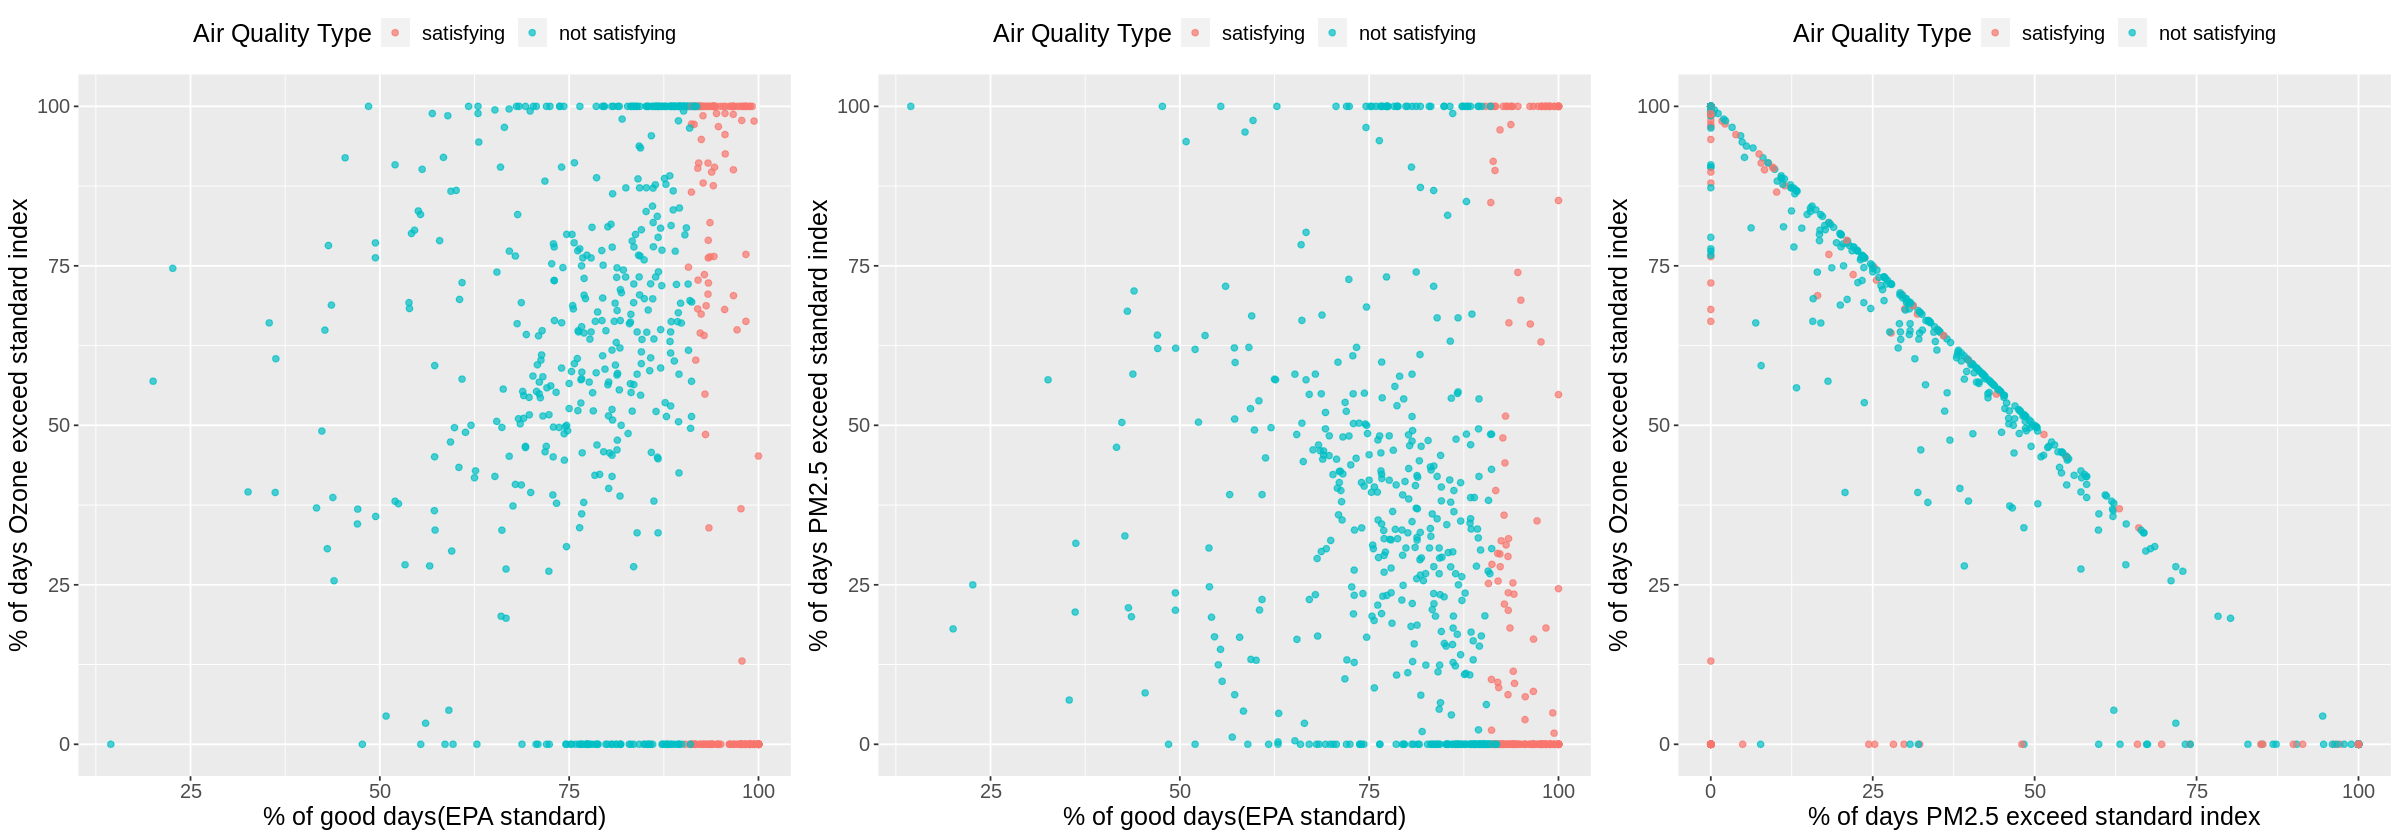

In [9]:
options(repr.plot.width = 20, repr.plot.height = 7)
train_plot1 <- ggplot(data = Air_quality_train,aes(x = per_good_days, y = per_days_Ozone)) +
    geom_point(aes(colour = air_quality_type), alpha = 0.7) +
    labs(colour = "Air Quality Type") +
    xlab("% of good days(EPA standard)") + 
    ylab("% of days Ozone exceed standard index") +
    theme(text = element_text(size = 15), legend.position="top")

train_plot2 <- ggplot(data = Air_quality_train,aes(x = per_good_days, y = per_days_PM2.5)) +
    geom_point(aes(colour = air_quality_type), alpha = 0.7) +
    labs(colour = "Air Quality Type") +
    xlab("% of good days(EPA standard)") + 
    ylab("% of days PM2.5 exceed standard index") +
    theme(text = element_text(size = 15), legend.position="top")

train_plot3 <- ggplot(data = Air_quality_train,aes(x = per_days_PM2.5, y = per_days_Ozone)) +
    geom_point(aes(colour = air_quality_type), alpha = 0.7) +
    labs(colour = "Air Quality Type") +
    xlab("% of days PM2.5 exceed standard index") + 
    ylab("% of days Ozone exceed standard index") +
    theme(text = element_text(size = 15),legend.position = "top")



    
plot_grid(train_plot1, train_plot2, train_plot3, ncol = 3)

*(plot1.1.1)  &  (plot1.1.2)  &  (plot1.1.3)*

The above three graphs show the relationthip between Air quality type and each two variables. By observing *plot1.1.1* and *plot1.1.2*, we can say that, with higher percentage of good days(based on EPA standard), it is more likely to be classified as a satisfying air quality. It is hard to tell from the first two graphs that if there any relationship between % of day Ozone/PM2.5 exceed standard index and Air quality type. But by observing the third graph(*plot1.1.3*), we can conclude that it is more likely to be a satisfying air quality type when % of days Ozone/PM2.5 exceed standard are lower.

### ---Data analysis

First we standardlize the training data using `recipe` function from `tidymodels`.

In [10]:
Air_quality_recipe <- recipe(air_quality_type ~ per_good_days+per_days_Ozone+per_days_PM2.5, data = Air_quality_train) %>%
    step_scale(all_predictors())%>%
    step_center(all_predictors())

In order to get the most appropriate K value for this model, we will test the accuracy of a list of K value. This will be accomplished by using `neighbors = tune()`. In order to reduce the code running time. We choose K values from **1 to 100** by step size = 5 to find the appropriate range first.

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
k_values <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

Use the `vfold_cv` function to split the air quality training data into 5 folds for later 5-fold cross-validation.

In [12]:
cancer_vfold <- vfold_cv(Air_quality_train, v = 5, strata = air_quality_type)

Put thoes K values into the workflow and validate their accurarcy by 5-fold cross-validation. Then we collect the mean accuracy value.

In [13]:
knn_results <- workflow() %>%
  add_recipe(Air_quality_recipe)%>%
  add_model(knn_spec) %>%
  tune_grid(resamples = cancer_vfold,grid = k_values) %>%
  collect_metrics()

accuracies <- knn_results %>% 
  filter(.metric == "accuracy")
  


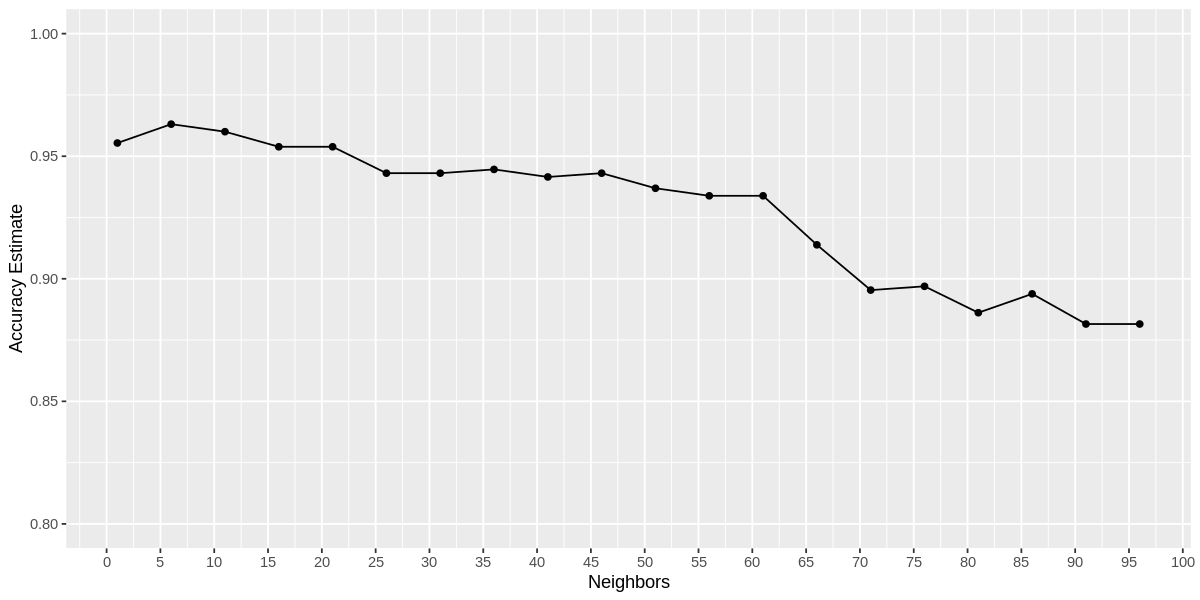

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 100, by = 5)) + 
       scale_y_continuous(limits = c(0.8, 1.0))
accuracy_versus_k

*plot1.2*

By observing *plot1.2*, we notice that the optimal K value shoud be fall in the range of **1 to 20**. So we conduct the validation again with K value ranged from 1 to 20(with step size = 1). Then find the optimal K value.

In [20]:
k_opt <-tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_opt_results <- workflow() %>%
  add_recipe(Air_quality_recipe)%>%
  add_model(knn_spec) %>%
  tune_grid(resamples = cancer_vfold,grid = k_opt) %>%
  collect_metrics()

accuracies_opt <- knn_opt_results %>%
  filter(.metric == "accuracy")

In [21]:
k <- arrange(accuracies_opt,desc(mean))%>%
  slice(1)%>%
  select(neighbors, mean)
k

neighbors,mean
<dbl>,<dbl>
5,0.9631


*table1.6*

The optimal k value is 5 with the mean accuracy 0.96. We can visualize this through all the k values we choose too.

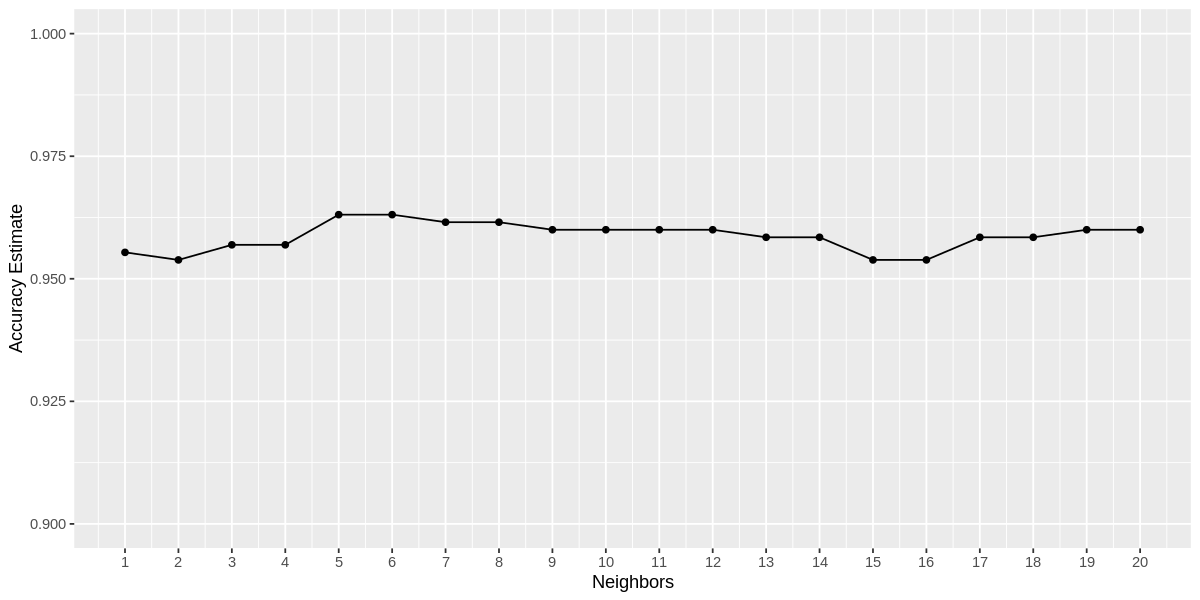

In [22]:
options(repr.plot.width = 10, repr.plot.height = 5)
accuracy_versus_k_final <- ggplot(accuracies_opt, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 20, by = 1)) + 
       scale_y_continuous(limits = c(0.9, 1.0))
accuracy_versus_k_final

*plot1.3*

We found the optimal K value is **5**. Then we change `neighbors = 5` in the model.

In [23]:
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)%>%
  set_engine("kknn")%>%
  set_mode("classification")

knn_fit_final <- workflow() %>%
  add_recipe(Air_quality_recipe)%>%
  add_model(knn_spec_final)%>%
  fit(data = Air_quality_train)

Now we use the trained model with **k = 5** to predict the test set.

In [24]:
Air_quality_predictions <- predict(knn_fit_final, Air_quality_test) %>%
  bind_cols(Air_quality_test)
head(Air_quality_predictions,n = 15)

.pred_class,county,per_good_days,per_days_Ozone,per_days_PM2.5,air_quality_type
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
satisfying,Clay,90.41,0.00,100.000,not satisfying
not satisfying,Montgomery,78.45,46.55,53.448,not satisfying
not satisfying,Morgan,78.60,35.80,64.198,not satisfying
not satisfying,Russell,77.78,30.45,69.547,not satisfying
not satisfying,Coconino,64.84,100.00,0.000,not satisfying
not satisfying,Maricopa,17.11,78.95,2.632,not satisfying
satisfying,Mohave,99.27,0.00,0.000,satisfying
not satisfying,Pinal,25.64,60.07,4.762,not satisfying
not satisfying,Yuma,63.37,70.33,15.751,not satisfying


*table1.7*

By roughly observing table 1.7, it seems that the prediction model is pretty accuracate. We will use `metrics` function to get the real accuracy.

In [25]:
pred_accuracy<- Air_quality_predictions %>%
  metrics(truth = air_quality_type, estimate = .pred_class)%>%
  filter(.metric == "accuracy")
pred_confusion <- Air_quality_predictions %>%
  conf_mat(truth = air_quality_type, estimate = .pred_class)

pred_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9656


*tabel1.8.1*

In [26]:
pred_confusion

                Truth
Prediction       satisfying not satisfying
  satisfying             91              7
  not satisfying          5            246

*table1.8.2*

Our prediction model on the air quality type have **96%** accuracy as indicated in *table1.8.1*. By fitting the model to predict the test set of the original data, the confusion table(*table1.8.2*) shows that we successfully predicet 91 of satifying type and 246 of the not satisfying type. The mis-predicted ones might be caused by some outliers.For example, some counties have overall good air conditions but there are some natural factors (forest fire, vacalno emission) causing a short time high pollutants concentration. These conditions make the county have high `per_good_days` and high `per_days_Ozone/PM2.5`.

We can visualize this result by comparing the true classification and predicted classification graph(*plot1.4.1&plot1.4.2*).
This graph is used in *plot1.1.1* to show the relationship among `per_days_Ozone`,`per_good_days`and `air_quality_type` for the training set.

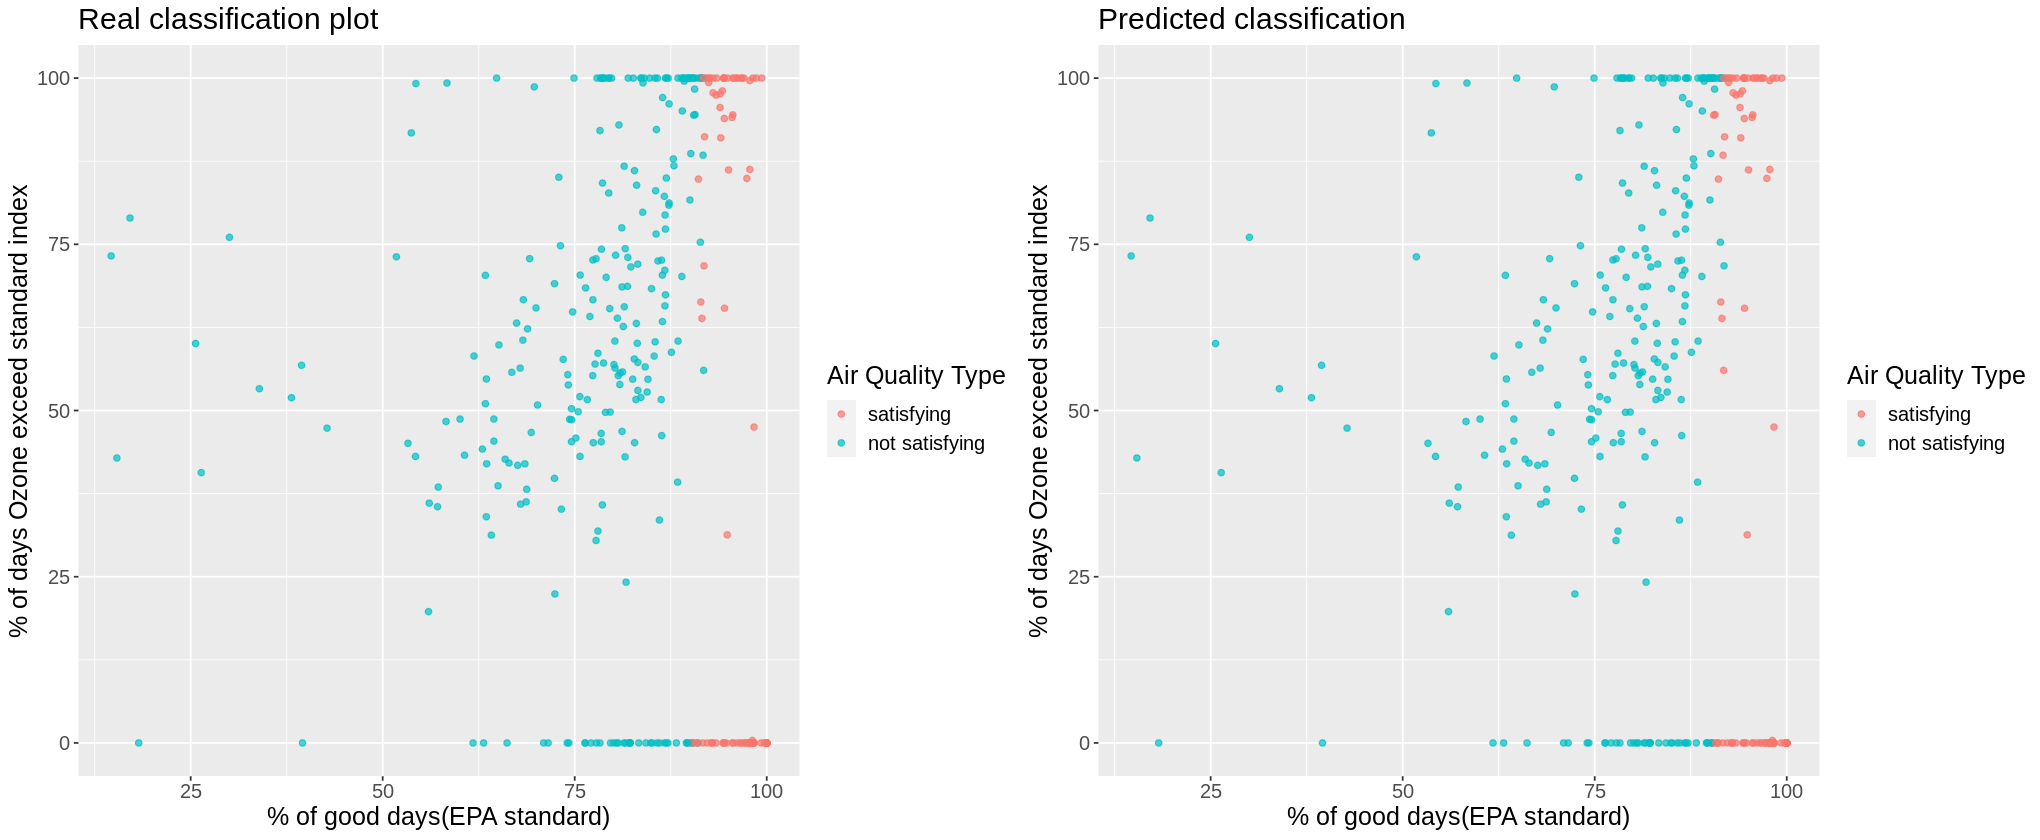

In [56]:
options(repr.plot.width = 17, repr.plot.height = 7)
test_plot1 <- ggplot(data = Air_quality_test,aes(x = per_good_days, y = per_days_Ozone)) +
    geom_point(aes(colour = air_quality_type), alpha = 0.7) +
    labs(colour = "Air Quality Type",title = "Real classification plot") +
    xlab("% of good days(EPA standard)") + 
    ylab("% of days Ozone exceed standard index") +
    theme(text = element_text(size = 15), legend.position="right")

pred_plot1 <- ggplot(data = Air_quality_predictions,aes(x = per_good_days, y = per_days_Ozone)) +
    geom_point(aes(colour = .pred_class), alpha = 0.7) +
    labs(colour = "Air Quality Type", title  = "Predicted classification") +
    xlab("% of good days(EPA standard)") + 
    ylab("% of days Ozone exceed standard index") +
    theme(text = element_text(size = 15), legend.position="right")
plot_grid(test_plot1, pred_plot1 , ncol = 2)

*plot1.4.1 & plot1.4.2*

As showned above, there are only few points are not consistent between two graphs. 

## Discussion

With regards to our research question: can a county's air quaility (measured by 90th Percentile AQI) correlated and be predicted by how many days that county exceeds Ozone and fine particle quantity (days_Ozone, days_pm2.5), our model revels a 96% accurate prediction for a testing data set extracted from the original Annual AQI by county 2021 dataset. This suggests that number of days Ozone exceeds recommended limit and number of days that fine particle quality exceeds limit are two very good predictors for whether a county has satisfactory air quality. 

From table 1.8.1, we can see that our model slightly favors classifying counties as 'not satisfying' when they actually satisfies our air quality measure of 50 as 90th percentile AQI. Meaning for counties that are on the borderline between having satisfying and not satisfying air quality, our model more likely classifies them as having not satisfying air quality. This is an added benefit to our model because we want to be absolutely certain a county has good air quality since it is a determinate for public health (WHO, 2021). 

The predictive power of our model could vary year by year, as this analysis was only performed on data from 2021, but without drastic changes in data reporting or guidelines for pollutant limits , we do not expect the accuracy to change very much. 
Therefore, we can apply this model to future years, perhaps with slight modifications, to counties whose 90% percentile AQI is unknown, and determine whether that county has satisfying air quality or not with just number of days Ozone and fine air particles exceeds limit. This new information could be very useful for families wanting to relocate to a county with better air quality and thus healthier environment. 


## References

Perlmutt, L. D., & Cromar, K. R. (2019). Comparing associations of respiratory risk for the EPA air quality index and health-based air quality indices. *Atmospheric Environment (1994), 202*, 1-7. https://doi.org/10.1016/j.atmosenv.2019.01.011

Abelsohn, A., & Stieb, D. M. (2011). Health effects of outdoor air pollution approach to counseling patients using the air quality health index. *Canadian Family Physician*, 57(8), 881-887.

Jasarevic, T., &amp; Osseiran, N. (2014, March 25). 7 million premature deaths annually linked to air pollution. World Health Organization. Retrieved April 8, 2022, from https://www.who.int/news/item/25-03-2014-7-million-premature-deaths-annually-linked-to-air-pollution 

Hoffmann, B., Boogaard, H., de Nazelle, A., Andersen, Z. J., Abramson, M., Brauer, M., Brunekreef, B., Forastiere, F., Huang, W., Kan, H., Kaufman, J. D., Katsouyanni, K., Krzyzanowski, M., Kuenzli, N., Laden, F., Nieuwenhuijsen, M., Mustapha, A., Powell, P., Rice, M., … Thurston, G. (2021, September 23). Who air quality guidelines 2021–aiming for Healthier Air for all: A joint statement by Medical, Public Health, scientific societies and patient representative organisations. Frontiers. Retrieved April 9, 2022, from https://www.ssph-journal.org/articles/10.3389/ijph.2021.1604465/full 

United States Environmental Protection Agency(EPA). (2021). Annual summart data. *annual_aqi_by_county_2021.csv*. Retrieved March 3,2022, from https://aqs.epa.gov/aqsweb/airdata/download_files.html#Meta